In [ ]:
# Start writing code here...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pareto
from scipy.stats import genpareto
import seaborn as sns
import scipy.stats as stats

In [ ]:
ret=pd.read_csv('log_return.csv')
ret.index=pd.to_datetime(ret['Date'])
ret

,Date,Shell,Philips,Heineken,TomTom,Aegon,ING,Apple,Micro,SP500,AEX
Date,,,,,,,,,,,
2010-01-05,2010-01-05,0.006927,-0.002328,-0.021223,0.047346,-0.002290,0.019074,0.002614,0.000323,0.003111,-0.002949
2010-01-06,2010-01-06,-0.007390,-0.015504,0.008124,-0.002894,-0.003549,0.001349,-0.017117,-0.006156,0.000545,-0.001580
2010-01-07,2010-01-07,-0.003251,-0.005698,-0.014185,0.018665,0.020086,0.023969,-0.001329,-0.010454,0.003993,-0.002727
2010-01-08,2010-01-08,-0.005597,0.001428,0.000608,0.004258,0.030486,0.022122,0.006627,0.006873,0.002878,0.004073
2010-01-11,2010-01-11,0.003269,0.009465,0.032280,-0.008535,-0.015632,-0.024757,-0.009290,-0.012802,0.001745,-0.004161
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,2019-12-23,0.003037,0.000000,0.004989,0.006336,-0.008229,-0.010124,0.016187,0.000000,0.000866,-0.000066
2019-12-24,2019-12-24,0.004539,0.003868,-0.005405,-0.005277,-0.005849,0.000000,0.000985,-0.000191,-0.000195,0.000181
2019-12-27,2019-12-27,0.001885,-0.001818,0.006856,0.010526,0.000244,-0.003707,0.019231,0.009989,0.005149,0.002753


In [ ]:
Apple=-ret['Apple']
Apple

Date
2010-01-05   -0.002614
2010-01-06    0.017117
2010-01-07    0.001329
2010-01-08   -0.006627
2010-01-11    0.009290
                ...   
2019-12-23   -0.016187
2019-12-24   -0.000985
2019-12-27   -0.019231
2019-12-30   -0.005918
2019-12-31   -0.007246
Name: Apple, Length: 2492, dtype: float64

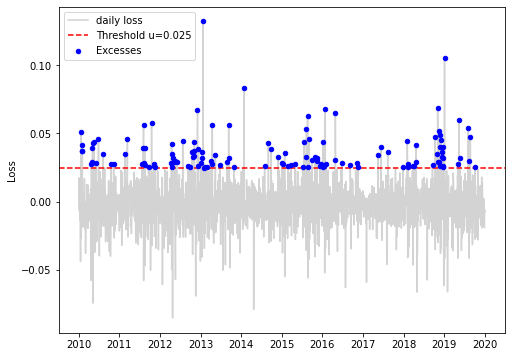

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(-ret['Apple'],c='lightgray',label='daily loss',zorder=1)
plt.scatter(Apple[Apple.values>0.025].index,Apple[Apple.values>0.025].values,marker='o',c='b',s=20,label='Excesses',zorder=3)
plt.axhline(0.025,ls='--',color='r',label='Threshold u=0.025',zorder=2)
plt.ylabel('Loss')
plt.legend(loc='best')
plt.savefig('loss_exceed.jpg',dpi=100)

In [ ]:
#thres_range = np.logspace(-10,-1.15,200)
thres_range=np.linspace(0,0.07,100)
mean_excess=[]
for i in thres_range:
    excess = np.mean(Apple[Apple.values>i].values -i)
    mean_excess.append(excess)

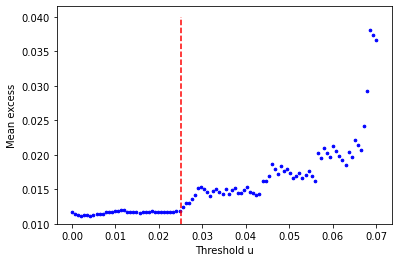

In [ ]:
plt.scatter(thres_range,mean_excess,c='b',s=7)
plt.xlabel('Threshold u')
plt.ylabel('Mean excess')
plt.vlines(x=0.025,ymin=0.01,ymax=0.04,colors='red',linestyles='--')
#plt.text(0.025,0.008,'0.025',fontsize=8,c='red',horizontalalignment='center')
plt.ylim(bottom=0.01)
plt.savefig('mean_exceed.jpg',dpi=100)

In [ ]:
apple_trans= Apple[Apple.values>0.025]-0.025
#apple_trans= Apple[Apple.values>0.025]
apple_trans

Date
2010-01-22    0.026081
2010-01-28    0.016271
2010-01-29    0.012200
2010-02-04    0.012200
2010-04-27    0.002399
                ...   
2019-05-20    0.006824
2019-08-05    0.028969
2019-08-14    0.005120
2019-08-23    0.022417
2019-10-02    0.000432
Name: Apple, Length: 134, dtype: float64

In [ ]:
genpareto.fit(apple_trans)

(0.48122572817324255, 1.3019886053059386e-06, 0.007231117695855887)

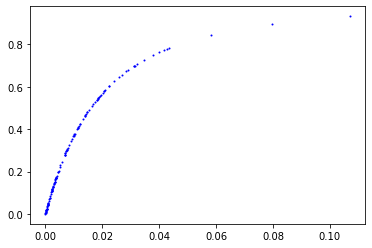

In [ ]:
# c,loc,scale=genpareto.fit(apple_trans) # xi is shape, beta is scale
# gpd=lambda x: 1-(1+ c*x/scale )**(-1/c)
# scale_Fu= scale+c*0.025
# Fu= lambda x: 1-(1+ c*x/scale_Fu )**(-1/c)
# gpd_y=[gpd(x) for x in apple_trans]
# Fu_y=[Fu(x) for x in apple_trans]
# #plt.scatter(apple_trans,gpd_y,c='blue',s=1)
# plt.scatter(apple_trans,Fu_y,c='blue',s=1)


In [ ]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return x,y

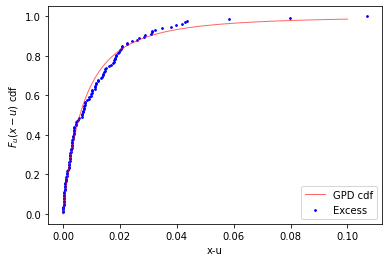

In [ ]:
#gdp_cdf=np.array([gpd(x) for x in Apple]).cumsum()
c,loc,scale=genpareto.fit(apple_trans) # xi is shape, beta is scale
Fu_x, Fu_cdf=ecdf(apple_trans)
x = np.linspace(0,0.1,100)
plt.figure(figsize=(6,4))
plt.plot(x, genpareto.cdf(x, c,loc=loc, scale=scale),
       'r-', lw=1, alpha=0.6, label='GPD cdf') 
plt.scatter(Fu_x, Fu_cdf,c='blue',s=3,label='Excess')
plt.xlabel('x-u')
plt.ylabel('$F_u(x-u)$ cdf')
plt.legend()
plt.savefig('ecdf.jpg',dpi=100)

In [ ]:
def evt_VaR_ES(asset,u=0.025,CI=0.99):
    exce= asset[asset.values > u]-u
    c,loc,scale=genpareto.fit(exce)
    mid=(len(asset)/len(exce) *(1-CI))**(-c)
    VaR=u+ scale/c * (mid-1 )
    ES= VaR/(1-c) + (scale-c*u)/(1-c)
    return VaR,ES


In [ ]:
evt_VaR_ES(-ret['Apple'],CI=0.999)

(0.11221923751293186, 0.2070644552710761)

In [ ]:
cal_VaR_ES(-ret['Apple'],CI=0.999,method='student',df=3)

(0.09720992880012638, 0.14618621381768931)

In [ ]:
print(hs_VaR_999,hs_ES_999)

0.0760170265053857 0.10668576593863337


In [ ]:
evt_VaR_ES(-ret['Apple'],CI=0.99)

(0.04373485390773178, 0.07505254310733996)

In [ ]:
cal_VaR_ES(-ret['Apple'],CI=0.99,method='student',df=3)

(0.043717429009237196, 0.06693258367237102)

In [ ]:
print(hs_VaR_99,hs_ES_99)

0.044330502900009394 0.06074318790388501


In [ ]:
evt_VaR_ES(-ret['Apple'],CI=0.975)

(0.03169656945819434, 0.0518472973900705)

In [ ]:
cal_VaR_ES(-ret['Apple'],CI=0.975,method='student',df=3)

(0.030911872394812075, 0.04842083990739653)

In [ ]:
print(hs_VaR_975,hs_ES_975)

0.03240224654815089 0.046988921649888514


In [ ]:
temp = -ret['Apple']
hs_VaR_975 = temp.quantile(q=0.975)
hs_ES_975= temp[temp >= temp.quantile(0.975)].mean()
hs_VaR_99 =temp.quantile(q=0.99)
hs_ES_99= temp[temp >= temp.quantile(0.99)].mean()
hs_VaR_999 =temp.quantile(q=0.999)
hs_ES_999= temp[temp >= temp.quantile(0.999)].mean()

In [ ]:
print(hs_VaR_975,hs_VaR_99,hs_ES_975,hs_ES_99,hs_VaR_999,hs_ES_999)

0.03240224654815089 0.044330502900009394 0.046988921649888514 0.06074318790388501 0.0760170265053857 0.10668576593863337


In [ ]:
def cal_VaR_ES(returns,CI=0.975,method='normal',df=3):
    port_mean = returns.mean()
    port_stdev = returns.std()
    if method=='normal':
            VaR=(-port_mean + norm.ppf(CI)*port_stdev)
            #print('VaR',VaR)
            ES=(-port_mean + port_stdev*norm.pdf(norm.ppf(CI))/(1-CI))
            #print('ES',ES)

    elif method=='student':
            t_std= np.sqrt((df-2)/df)*port_stdev
            VaR=(-port_mean+ stats.t.ppf(CI,df)*t_std)
            #print('VaR',VaR)
            ES=(-port_mean + t_std*stats.t.pdf(x=stats.t.ppf(CI,df=df),df=df)/(1-CI)*((df+stats.t.ppf(CI, df)**2)/(df-1)))
            #print('ES',ES)

    return VaR, ES

In [ ]:
stu_VaR_975, stu_ES_975 = cal_VaR_ES(-ret['Apple'],CI=0.975,method='student',df=3)
stu_VaR_99, stu_ES_99 = cal_VaR_ES(-ret['Apple'],CI=0.99,method='student',df=3)
stu_VaR_999, stu_ES_999= cal_VaR_ES(-ret['Apple'],CI=0.999,method='student',df=3)

In [ ]:
print(stu_VaR_975,stu_VaR_99,stu_VaR_999,stu_ES_975,stu_ES_99,stu_ES_999)

0.030911872394812075 0.043717429009237196 0.09720992880012638 0.04842083990739653 0.06693258367237102 0.14618621381768931


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=645d3506-ee2c-44c9-a8e9-fa6f8711818a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>